# Website Phishing

## Group Members:
#### Dino Anastasopoulos: 1900661

#### Timothy Walters: 1855167

#### Razeen Gani: 1842173

#### Reece James Peters: 1924514

## Library imports

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

## Attributes

## Create empty design matrix

In [2]:
designMatrix = pd.DataFrame(columns = [
    'SFH',
    'PopUpWindow',
    'SSL_Final_State',
    'Request_URL',
    'URL_of_Anchor',
    'Web_Traffic',
    'URL_Length',
    'Age_Of_Domain',
    'IP_Address',
    'Class',
] ) 

## Import data and populate designMatrix

In [3]:
lineNum = 0

for line in open("Files/data.txt", "r"):
    lineSplit = line.strip().split(",")
    designMatrix.loc[lineNum] = lineSplit   
    lineNum+=1
    
designMatrix

,SFH,PopUpWindow,SSL_Final_State,Request_URL,URL_of_Anchor,Web_Traffic,URL_Length,Age_Of_Domain,IP_Address,Class
0,1,-1,1,-1,-1,1,1,1,0,0
1,-1,-1,-1,-1,-1,0,1,1,1,1
2,1,-1,0,0,-1,0,-1,1,0,1
3,1,0,1,-1,-1,0,1,1,0,0
4,-1,-1,1,-1,0,0,-1,1,0,1
...,...,...,...,...,...,...,...,...,...,...
1348,-1,-1,-1,-1,-1,-1,0,1,0,1
1349,-1,0,1,0,-1,0,0,1,0,-1
1350,-1,0,-1,-1,-1,0,-1,-1,0,1
1351,0,0,1,0,0,0,-1,1,0,1


## Split into training, validation and testing data

In [4]:
trainData, testData = train_test_split(designMatrix, test_size = 0.4)

testData, valData = train_test_split(testData, test_size = 0.5)

In [5]:
print("trainData size: " + str(len(trainData)))
print("valData size: " + str(len(valData)))
print("testData size: " + str(len(testData)))

trainData size: 811
valData size: 271
testData size: 271


## Splitting the train,val and test data by their attributes and classes

In [6]:
train_x = trainData[[ 'SFH',
    'PopUpWindow',
    'SSL_Final_State',
    'Request_URL',
    'URL_of_Anchor',
    'Web_Traffic',
    'URL_Length',
    'Age_Of_Domain',
    'IP_Address',]]
print(train_x)


train_y =trainData['Class']
OG_train_y=train_y
#print(train_y)

test_x =  testData[[ 'SFH',
    'PopUpWindow',
    'SSL_Final_State',
    'Request_URL',
    'URL_of_Anchor',
    'Web_Traffic',
    'URL_Length',
    'Age_Of_Domain',
    'IP_Address',]]

test_y =testData['Class']

val_x =  valData[[ 'SFH',
    'PopUpWindow',
    'SSL_Final_State',
    'Request_URL',
    'URL_of_Anchor',
    'Web_Traffic',
    'URL_Length',
    'Age_Of_Domain',
    'IP_Address',]]

val_y =valData['Class']

     SFH PopUpWindow SSL_Final_State Request_URL URL_of_Anchor Web_Traffic  \
609    1           1               1           1             1           1   
719    1           0               1          -1            -1          -1   
52     1           1               1          -1             1          -1   
17     1           1               1          -1             1          -1   
161    1           0              -1           0            -1           1   
...   ..         ...             ...         ...           ...         ...   
563    1           0               1          -1            -1           1   
1143   1           0              -1          -1            -1           1   
1340  -1           0              -1          -1             1           1   
772    1          -1               1          -1            -1           1   
397   -1           0              -1          -1             1           1   

     URL_Length Age_Of_Domain IP_Address  
609           1     

## Defining our logistic regression function, learning rate, tolerance and creating default "true" thetas

In [27]:
def h(x, θ): # Regression function
    return 1/(1+np.exp(-np.dot(x, θ))) # logistic regression using the dot product

l_rate = 0.00001
tol = 0.001

## Model 1: Create A Conversion Matrix 
#### We keep all y-values equal to 1 as 1 and we convert all y-values equal to 0 or -1 to 0

In [28]:
#holder = train_y 
holder = val_y 
#holder = test_y #For testing data

Con1 = np.copy(holder)
Con1 = Con1.reshape(holder.shape[0])

#print(Con1.shape)
#print(Con1) 
#print(Con1[87])

#Check if there are instances of -1 in dataset
if "-1" in Con1:
    print('Before: Element -1 exists in Dataframe')
else:
    print('Before: No instances of -1 in dataset')

#Change all 0's and -1's to 0's, and all 1's remain unchanged
for x in range(Con1.shape[0]):    
    if Con1[x] == "-1" or Con1[x] == "0":
        Con1[x] = "0"

#Check that theres no instances of -1 in dataset
if "-1" in Con1:
    print('After: Element -1 exists in Dataframe')
else:
    print('After: No instances of -1 in dataset')
    
#print(Con1) 
#print(Con1[87])

Before: Element -1 exists in Dataframe
After: No instances of -1 in dataset


## Logistic Regression For Model 1

In [29]:
#thetas1= np.ones(train_x.shape[1]) # initialize our parameters
#thetas1= np.ones(test_x.shape[1]) # initialize our parameters for test data
thetas1= np.ones(val_x.shape[1]) # initialize our parameters for val data
#thetas_old = np.zeros(train_x.shape[1]) #initialises "old parameters which will go in our regression function"
#thetas_old = np.zeros(test_x.shape[1]) #initialises "old parameters which will go in our regression function" for test data
thetas_old = np.zeros(val_x.shape[1]) #initialises "old parameters which will go in our regression function" for validation data

print(thetas1)
print(thetas_old)
print(thetas1.shape)
print(thetas_old.shape)

model1_y = np.array(Con1,dtype = np.float64)
#model1_y = model1_y.reshape(811,1)
model1_y = model1_y.reshape(271,1)
print(model1_y[0])
print(model1_y.shape)
#X = np.array(train_x, dtype = np.float64)  
#X = np.array(test_x, dtype = np.float64)  
X = np.array(val_x, dtype = np.float64)  
print(X[0])
print(X.shape)

error1 = []
timeline1 = []
iterations1 = 0

while np.linalg.norm(abs(thetas1 - thetas_old)) > tol:
    thetas_old = thetas1
    
    for i in range(X.shape[0]): 
        thetas1 = thetas1 - l_rate*( (h(X[i], thetas1) - model1_y[i]) * X[i] ) 

     
    if iterations1%50 == 0:                              
        j = 0.5 * pow(model1_y[i] - h(X[i], thetas1), 2) 
        error1.append(j)
        timeline1.append(iterations1)   
        #print("Error:" + str(error))
        #print("Timeline: " + str(timeline))
        #print()       

    iterations1 = iterations1+1   
        
print(iterations1)        
print("Model Parameters: ", thetas1)

[1. 1. 1. 1. 1. 1. 1. 1. 1.]
[0. 0. 0. 0. 0. 0. 0. 0. 0.]
(9,)
(9,)
[1.]
(271, 1)
[-1. -1. -1. -1.  1.  0.  0.  1.  0.]
(271, 9)
1414
Model Parameters:  [-0.62202045  0.24042536 -0.16520533  0.48708354  0.07667103  1.28155554
  0.48453797  0.28415741  0.84362895]


### Plot Model 1 error

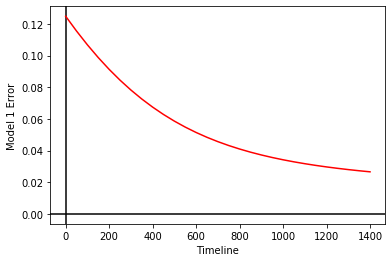

In [30]:
size = len(error1)

x1_time = np.zeros(size)
y1_error= np.zeros(size) 

for i in range(0, size):
    x1_time[i] = timeline1[i]
    y1_error[i] = error1[i]

plt.axhline(0,color='black') # plot horizontal axis at 0
plt.axvline(0,color='black') # plot vertical axis at 0
plt.xlabel('Timeline')
plt.ylabel('Model 1 Error')
plt.plot(x1_time, y1_error, color="red")

## Model 2: Create A Conversion Matrix

##### We keep all y-values equal to 0 as 1 and we convert all y-values equal to 1 or -1 to 0

In [31]:
#holder = train_y
#holder = test_y 
holder = val_y 
Con2 = np.copy(holder)
Con2 = Con2.reshape(holder.shape[0])

#print(Con2.shape)
#print(Con2)
#print(Con2[19])
#print(Con2[33])

#Check if there are instances of -1 in dataset
if "-1" in Con2:
    print('Before: Element -1 exists in Dataframe')
else:
    print('Before: No instances of -1 in dataset')
    
#Change all 0's to 1's, and change all 1's and -1's to 0's
for x in range(Con2.shape[0]):    
    if Con2[x] == "0":
        Con2[x] = 1
    elif Con2[x] == "1" or Con2[x] == "-1":
        Con2[x] = 0         

#Check that theres no instances of -1 in dataset
if "-1" in Con2:
    print('After: Element -1 exists in Dataframe')
else:
    print('After: No instances of -1 in dataset')
                
#print(Con2)
#print(Con2[19])
#print(Con2[33])

Before: Element -1 exists in Dataframe
After: No instances of -1 in dataset


## Logistic Regression For Model 2

In [32]:
#thetas2= np.ones(train_x.shape[1]) # initialize our parameters
#thetas2= np.ones(test_x.shape[1]) # initialize our parameters
thetas2= np.ones(val_x.shape[1]) # initialize our parameters

#thetas_old = np.zeros(train_x.shape[1]) #initialises "old parameters which will go in our regression function"
#thetas_old = np.zeros(test_x.shape[1]) #initialises "old parameters which will go in our regression function"
thetas_old = np.zeros(val_x.shape[1]) #initialises "old parameters which will go in our regression function"

print(thetas2)
print(thetas_old)
print(thetas2.shape)
print(thetas_old.shape)

model2_y = np.array(Con2,dtype = np.float64)
#model2_y = model2_y.reshape(811,1)
model2_y = model2_y.reshape(271,1)
print(model2_y[0])
print(model2_y.shape)
#X2 = np.array(train_x, dtype = np.float64)  
#X2 = np.array(test_x, dtype = np.float64)  
X2 = np.array(val_x, dtype = np.float64)  
print(X2[0])
print(X2.shape)

error2 = []
timeline2 = []
iterations2 = 0

while np.linalg.norm(abs(thetas2 - thetas_old)) > tol:
    thetas_old = thetas2
    for i in range(X2.shape[0]): 
        thetas2 = thetas2 - l_rate*( (h(X2[i], thetas2) - model2_y[i]) * X2[i] )
        
    if iterations2%50 == 0:                              
        j = 0.5 * pow(model2_y[i] - h(X2[i], thetas2), 2) 
        error2.append(j)
        timeline2.append(iterations2)   
        #print("Error:" + str(error2))
        #print("Timeline: " + str(timeline2))
        #print()       

    iterations2 = iterations2+1   
        
print(iterations2)        
print("Model Parameters: ", thetas2)

[1. 1. 1. 1. 1. 1. 1. 1. 1.]
[0. 0. 0. 0. 0. 0. 0. 0. 0.]
(9,)
(9,)
[0.]
(271, 1)
[-1. -1. -1. -1.  1.  0.  0.  1.  0.]
(271, 9)
1132
Model Parameters:  [-0.01171621  0.89985244  0.22936681  0.78468451  0.40636388  1.0610715
  0.74197717  0.42184858  0.79053948]


### Plot Model 2 error

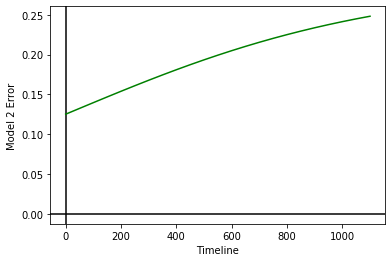

In [33]:
size = len(error2)

x2_time = np.zeros(size)
y2_error= np.zeros(size) 

for i in range(0, size):
    x2_time[i] = timeline2[i]
    y2_error[i] = error2[i]

plt.axhline(0,color='black') # plot horizontal axis at 0
plt.axvline(0,color='black') # plot vertical axis at 0
plt.xlabel('Timeline')
plt.ylabel('Model 2 Error')
plt.plot(x2_time, y2_error, color="green")

## Model 3: Create A Conversion Matrix

##### We keep all y-values equal to -1 as 1 and we convert all y-values equal to 1 or 0 to 0

In [34]:
#holder = train_y 
#holder = test_y 
holder = val_y 
Con3 = np.copy(holder)
Con3 = Con3.reshape(holder.shape[0])

#print(Con3.shape)
#print(Con3)
#print(Con3[1])
#print(Con3[2])

#Check if there are instances of -1 in dataset
if "-1" in Con3:
    print('Before: Element -1 exists in Dataframe')
else:
    print('Before: No instances of -1 in dataset')
    print(Con3)
    
#Change all -1's to 1's, and change all 1's and 0's to 0
for x in range(Con3.shape[0]):    
    if Con3[x] == "-1":
        Con3[x] = 1
    elif Con3[x] == "1" or Con3[x] == "0":
        Con3[x] = 0

#Check that theres no instances of -1 in dataset
if "-1" in Con3:
    print('After: Element -1 exists in Dataframe')
else:
    print('After: No instances of -1 in dataset')
        
#print(Con3)
#print(Con3[1])
#print(Con3[2])

Before: Element -1 exists in Dataframe
After: No instances of -1 in dataset


In [36]:
#thetas3= np.ones(train_x.shape[1]) # initialize our parameters
#thetas3= np.ones(test_x.shape[1]) # initialize our parameters
thetas3= np.ones(val_x.shape[1]) # initialize our parameters

#thetas_old = np.zeros(train_x.shape[1]) #initialises "old parameters which will go in our regression function"
#thetas_old = np.zeros(test_x.shape[1]) #initialises "old parameters which will go in our regression function"
thetas_old = np.zeros(val_x.shape[1]) #initialises "old parameters which will go in our regression function"

print(thetas3)
print(thetas_old)
print(thetas3.shape)
print(thetas_old.shape)

model3_y = np.array(Con3,dtype = np.float64)
#model3_y = model3_y.reshape(811,1)
model3_y = model3_y.reshape(271,1)
print(model3_y[0])
print(model3_y.shape)
#X3 = np.array(train_x, dtype = np.float64)  
#X3 = np.array(test_x, dtype = np.float64)  
X3 = np.array(val_x, dtype = np.float64)  
print(X3[0])
print(X3.shape)

error3 = []
timeline3 = []
iterations3 = 0

while np.linalg.norm(abs(thetas3 - thetas_old)) > 0.0005:
    thetas_old = thetas3
    for i in range(X3.shape[0]): 
        thetas3 = thetas3 - l_rate*( (h(X3[i], thetas3) - model3_y[i]) * X3[i] )
  
    if iterations3%20 == 0:                              
        j = 0.5 * pow(model3_y[i] - h(X3[i], thetas3), 2) 
        error3.append(j)
        timeline3.append(iterations3)   
        #print("Error:" + str(error3))
        #print("Timeline: " + str(timeline3))
        #print()       

    iterations3 = iterations3 + 1   
        
print(iterations3)        
print("Model Parameters: ", thetas3) 

[1. 1. 1. 1. 1. 1. 1. 1. 1.]
[0. 0. 0. 0. 0. 0. 0. 0. 0.]
(9,)
(9,)
[0.]
(271, 1)
[-1. -1. -1. -1.  1.  0.  0.  1.  0.]
(271, 9)
1
Model Parameters:  [1.00012681 1.00011827 1.00007058 0.99994956 0.99992971 0.99987408
 0.99978617 0.99998503 0.99994865]


### Plot Model 3 error

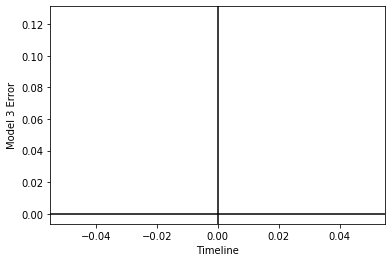

In [37]:
size = len(error3)

x3_time = np.zeros(size)
y3_error= np.zeros(size) 

for i in range(0, size):
    x3_time[i] = timeline3[i]
    y3_error[i] = error3[i]

plt.axhline(0,color='black') # plot horizontal axis at 0
plt.axvline(0,color='black') # plot vertical axis at 0
plt.xlabel('Timeline')
plt.ylabel('Model 3 Error')
plt.plot(x3_time, y3_error, color="blue")

In [38]:
#Prints the predicted parameters for each model

print('Predicted Paramters For Model 1 ', thetas1)
print('Predicted Paramters For Model 2 ', thetas2)
print('Predicted Paramters For Model 3 ', thetas3)

Predicted Paramters For Model 1  [-0.62202045  0.24042536 -0.16520533  0.48708354  0.07667103  1.28155554
  0.48453797  0.28415741  0.84362895]
Predicted Paramters For Model 2  [-0.01171621  0.89985244  0.22936681  0.78468451  0.40636388  1.0610715
  0.74197717  0.42184858  0.79053948]
Predicted Paramters For Model 3  [1.00012681 1.00011827 1.00007058 0.99994956 0.99992971 0.99987408
 0.99978617 0.99998503 0.99994865]


#Plugs in thetas and training data to softmax function (Although not too sure about these values)

probability_m1 = f(X,thetas1)
probability_m2 = f(X2,thetas2)
probability_m3 = f(X3,thetas3)

print(probability_m1)
print(probability_m2)
print(probability_m3)

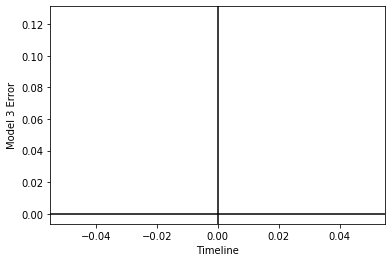

In [39]:
size = len(error3)

x3_time = np.zeros(size)
y3_error= np.zeros(size) 

for i in range(0, size):
    x3_time[i] = timeline3[i]
    y3_error[i] = error3[i]

plt.axhline(0,color='black') # plot horizontal axis at 0
plt.axvline(0,color='black') # plot vertical axis at 0
plt.xlabel('Timeline')
plt.ylabel('Model 3 Error')
plt.plot(x3_time, y3_error, color="blue")

In [40]:
#Prints the predicted parameters for each model

print('Predicted Paramters For Model 1 ', thetas1)
print('Predicted Paramters For Model 2 ', thetas2)
print('Predicted Paramters For Model 3 ', thetas3)

Predicted Paramters For Model 1  [-0.62202045  0.24042536 -0.16520533  0.48708354  0.07667103  1.28155554
  0.48453797  0.28415741  0.84362895]
Predicted Paramters For Model 2  [-0.01171621  0.89985244  0.22936681  0.78468451  0.40636388  1.0610715
  0.74197717  0.42184858  0.79053948]
Predicted Paramters For Model 3  [1.00012681 1.00011827 1.00007058 0.99994956 0.99992971 0.99987408
 0.99978617 0.99998503 0.99994865]


In [41]:
#Defines Softmax function

def f(X): # softmax function

    return np.exp(X) / np.sum(np.exp(X))

#Plugs in thetas and training data to softmax function (Although not too sure about these values)

#for x in range(len(X)):
    #predictedOut
print(X[1])    
y_mat = []
y_mat.append(1/np.dot(thetas1,X[796])) 
y_mat.append(1/np.dot(thetas2,X[796]))
y_mat.append(1/np.dot(thetas3,X[796])) 

print(train_y[796])

print(y_mat)
probs = f(y_mat)
print(probs)
print(max(probs))
#print(sum(probs))

In [42]:
y_mat = []
classification = []
probs=([])
for o in range(len(val_x)):#len(test_x)):#len(train_x)):
    y_mat.append(np.dot(thetas1,X[o])) 
    y_mat.append(np.dot(thetas2,X[o]))
    y_mat.append(np.dot(thetas3,X[o]))
    
    probs = f(y_mat)
    print(probs)
    maxPos = np.argmax(probs)
    print(maxPos)
    
    if maxPos == 0:
        classification.append(1)
    elif maxPos == 1:
        classification.append(0)
    elif maxPos == 2:    
        classification.append(-1)
    
    y_mat = []

print(classification)    

[0.76149969 0.17084716 0.06765315]
0
[0.11318126 0.26059114 0.6262276 ]
2
[0.85433303 0.12809058 0.01757639]
0
[0.05255096 0.09561854 0.85183051]
2
[0.77076447 0.18776824 0.04146729]
0
[0.87561853 0.11965171 0.00472976]
0
[0.88044708 0.10588593 0.01366699]
0
[0.05772946 0.12837824 0.8138923 ]
2
[0.37676342 0.43648186 0.18675473]
1
[0.00852917 0.04825009 0.94322074]
2
[0.01416013 0.0995495  0.88629038]
2
[0.00412489 0.03132264 0.96455247]
2
[0.00321606 0.03650481 0.96027913]
2
[0.00516935 0.03782964 0.95700101]
2
[0.0468788  0.11123644 0.84188476]
2
[0.00682347 0.04005403 0.9531225 ]
2
[0.12845818 0.25590437 0.61563746]
2
[0.83939046 0.14558466 0.01502488]
0
[0.04694557 0.13194004 0.82111439]
2
[0.02575387 0.11478536 0.85946077]
2
[0.02416427 0.06274322 0.9130925 ]
2
[0.69029159 0.25888838 0.05082002]
0
[0.1722715  0.28327051 0.54445799]
2
[0.03631704 0.15257156 0.8111114 ]
2
[0.45876014 0.30514703 0.23609283]
0
[0.04725519 0.07623645 0.87650837]
2
[0.5578495  0.23151044 0.21064006]
0
[

In [43]:
#print(train_y)
#print(test_y)
print(val_y)

724      1
812      0
759      1
484     -1
312      1
        ..
359     -1
683     -1
370     -1
1233    -1
805      1
Name: Class, Length: 271, dtype: object


In [52]:
count = 0

#Variables used in confusion matrix
true_count0 = 0
true_count1 = 0
true_count_neg1 = 0

pred1_when0 = 0
pred1_when_neg1 = 0

pred0_when1 = 0
pred0_when_neg1= 0

pred_neg1_when0 = 0
pred_neg1_when1 = 0

val_yy = np.array(val_y, dtype = np.float64) 
for d in range (len(val_yy)):#len(test_yy)):#len(train_yy)):
    if classification[d] == 0 and val_yy[d] == 0: #test_yy[d]: #train_yy[d]:
        true_count0 = true_count0+1
    if classification[d] == 1 and val_yy[d] == 1: #test_yy[d]: #train_yy[d]:
        true_count1 = true_count1+1
    if classification[d] == -1 and val_yy[d] == -1: #test_yy[d]: #train_yy[d]:
        true_count_neg1 = true_count_neg1+1   
        
    if classification[d] == 1 and val_yy[d] == 0: #test_yy[d]: #train_yy[d]:
        pred1_when0 = pred1_when0+1
    if classification[d] == 1 and val_yy[d] == -1: #test_yy[d]: #train_yy[d]:
        pred1_when_neg1 = pred1_when_neg1+1 
        
    if classification[d] == 0 and val_yy[d] == 1: #test_yy[d]: #train_yy[d]:
        pred0_when1 = pred0_when1+1
    if classification[d] == 0 and val_yy[d] == -1: #test_yy[d]: #train_yy[d]:
        pred0_when_neg1= pred0_when_neg1+1
        
    if classification[d] == -1 and val_yy[d] == 0: #test_yy[d]: #train_yy[d]:
        pred_neg1_when0 = pred_neg1_when0+1
    if classification[d] == -1 and val_yy[d] == 1: #test_yy[d]: #train_yy[d]:
         pred_neg1_when1 = pred_neg1_when1+1   

print("True predictions for 0,1,-1")            
print(true_count0)
print(true_count1)
print(true_count_neg1)
print(true_count0+true_count1+true_count_neg1)

print("False prediction 1 when value was 0 and -1")   
print(pred1_when0)
print(pred1_when_neg1)

print("False prediction 0 when value was 1 and -1") 
print(pred0_when1)
print(pred0_when_neg1)

print("False prediction -1 when value was 0 and 1") 
print(pred_neg1_when0)
print(pred_neg1_when1)
print()


#train_yy = np.array(train_y, dtype = np.float64)  
#test_yy = np.array(test_y, dtype = np.float64) 
val_yy = np.array(val_y, dtype = np.float64) 
for d in range (len(val_yy)):#len(test_yy)):#len(train_yy)):
    if classification[d] == val_yy[d]: #test_yy[d]: #train_yy[d]:
        count = count+1 
print("True predictions added up: ", count)
#print(len(train_y))
#print(len(test_y))
print("Number of prediction data points:", len(val_y))
#accuracy = count/len(train_y)
#accuracy = count/len(test_y)
accuracy = count/len(val_y)
print("Overall accuracy: ", accuracy)

True predictions for 0,1,-1
0
88
137
225
False prediction 1 when value was 0 and -1
7
11
False prediction 0 when value was 1 and -1
0
2
False prediction -1 when value was 0 and 1
12
14

True predictions added up:  225
Number of prediction data points: 271
Overall accuracy:  0.8302583025830258


## Confusion Matrix 

In [75]:

print("\t \t Predicted")
print("\t \t", "0 ", " 1"," -1")
print("actual 0 \t",true_count0," ", pred1_when0," ",pred_neg1_when0)
print("actual 1 \t",pred0_when1," ", true_count1," ",pred_neg1_when1)
print("actual -1 \t",pred0_when_neg1," ", pred1_when_neg1," ",true_count_neg1)

	 	 Predicted
	 	 0   1  -1
actual 0 	 0   7   12
actual 1 	 0   88   14
actual -1 	 2   11   137


## Accuracy, Missclassification Rate

In [77]:
print("Overall accuracy: ", accuracy)
print("Missclassification Rate: ", (1-accuracy))

Overall accuracy:  0.8302583025830258
Missclassification Rate:  0.1697416974169742
